# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [3]:
n = 5
label_name = "stat1"
epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [4]:

layers = [2]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [5]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 1.3436107635498047
Epoch 1, Loss 1.3430994153022766
Epoch 2, Loss 1.326977789402008
Epoch 3, Loss 1.33952397108078
Epoch 4, Loss 1.339254379272461
Epoch 5, Loss 1.339110791683197
Epoch 6, Loss 1.3231076002120972
Epoch 7, Loss 1.3170475363731384
Epoch 8, Loss 1.3107578754425049
Epoch 9, Loss 1.2998875975608826
Epoch 10, Loss 1.2816166877746582
Epoch 11, Loss 1.304077923297882
Epoch 12, Loss 1.2978803515434265
Epoch 13, Loss 1.2865422368049622
Epoch 14, Loss 1.259358286857605
Epoch 15, Loss 1.2669788002967834
Epoch 16, Loss 1.269481599330902
Epoch 17, Loss 1.2571001648902893
Epoch 18, Loss 1.2618923783302307
Epoch 19, Loss 1.242837905883789
Epoch 20, Loss 1.2311472296714783
Epoch 21, Loss 1.2311295866966248
Epoch 22, Loss 1.2033467292785645
Epoch 23, Loss 1.2080389857292175
Epoch 24, Loss 1.2015783190727234
Epoch 25, Loss 1.1968759894371033
Epoch 26, Loss 1.1923064589500427
Epoch 27, Loss 1.1916640400886536
Epoch 28, Loss 1.1735348105430603
Epoch 29, Loss 1.168524980545044


# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

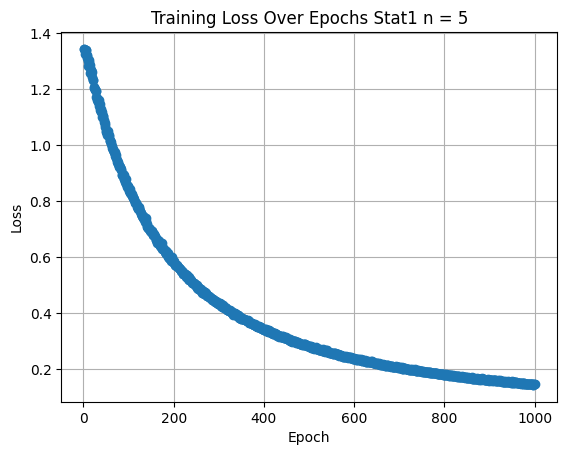

In [6]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs Stat1 n = 5')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_stat1.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file







# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

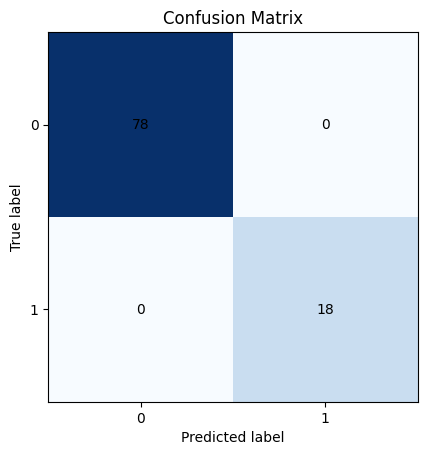

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [7]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

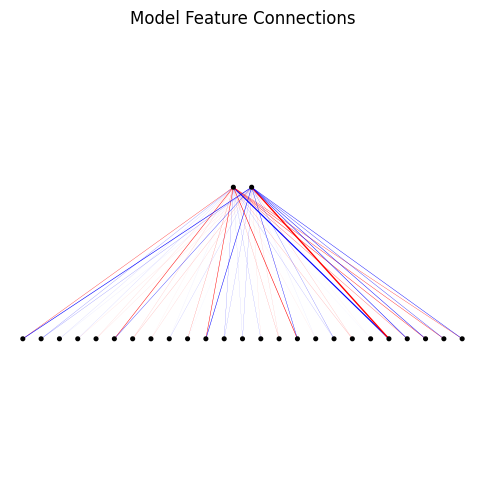

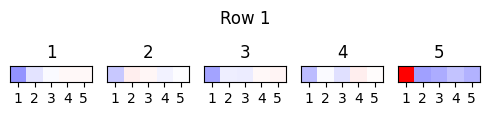

In [8]:

model.plot_connections()


model.plot_heatmap_feature(0, 1)


